In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def initialize_node_points(G):
    initial_node_points = [1 / G.number_of_nodes() for _ in range(G.number_of_nodes())]
    return G, initial_node_points

In [ ]:
iteration_counter = 0
def update_node_points(G, previous_node_points):
    global iteration_counter
    iteration_counter += 1
    updated_node_points = [0 for _ in range(G.number_of_nodes())]
    for node in G.nodes():
        node_references = G.out_edges(node)
        if len(node_references) == 0:
            updated_node_points[node] += previous_node_points[node]
        else:
            share = previous_node_points[node] / len(node_references)
            for each_reference in node_references:
                updated_node_points[each_reference[1]] += share
    return updated_node_points, iteration_counter

In [ ]:
def keep_updating_until_convergence(G, initial_node_points):
    convergence_value = 0.00001
    previous_node_points = initial_node_points
    while True:
        updated_node_points, iteration_counter = update_node_points(G, previous_node_points)
        for index in range(G.number_of_nodes()):
            if abs(updated_node_points[index] - previous_node_points[index]) > convergence_value:
                break
        else:
            return updated_node_points, iteration_counter
        previous_node_points = updated_node_points

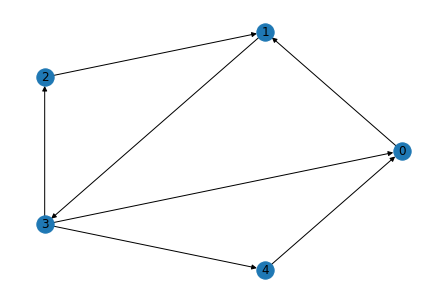

Nodes ordered by Page Ranks: B D A C E 

1. Node: 'B' has PageRank value: 0.300006
2. Node: 'D' has PageRank value: 0.300000
3. Node: 'A' has PageRank value: 0.199999
4. Node: 'C' has PageRank value: 0.099997
5. Node: 'E' has PageRank value: 0.099997

Convergence is achieved after 16067255 iterations (Convergence value: 0.00001)


In [33]:
def main():
    G = nx.DiGraph()
    nodes = [i for i in range(0,5)]
    nodes_dictionary = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E'}
    edges = [(0,1), (2,1), (1,3), (2,1), (3,0), (3,2), (3,4), (4,0)]
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    G, initial_node_points = initialize_node_points(G)
    pos=nx.shell_layout(G)
    nx.draw(G, pos, arrows=True, with_labels=True)
    plt.show()
    
    pageranks, iteration_counter = keep_updating_until_convergence(G, initial_node_points)
    pageranks_array = np.array(pageranks)
    node_index_sorted_by_pageranks = np.argsort(-pageranks_array)
    print("Nodes ordered by Page Ranks:", end =' ')
    for index in node_index_sorted_by_pageranks:
        print(nodes_dictionary[index], end =' ')
    print('\n')
    for rank, (index, PR) in enumerate(zip(node_index_sorted_by_pageranks, sorted(pageranks, reverse = True)), start = 1):
        print(f"{rank}. Node: '{nodes_dictionary[index]}' has PageRank value: {'%.6f' % PR}")
    print(f"\nConvergence is achieved after {iteration_counter} iterations (Convergence value: 0.00001)")
    
if __name__ == "__main__":
    main()